In [1]:
import pandas as pd
import numpy as np

In [2]:
sol=pd.read_csv('SMILES-DATA.csv')
sol

,SMILES,RESULT
0,CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C,0
1,CN(CC1=NC=2CCCCC2S1)C(=O)C=C,0
2,CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C,0
3,COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1,0
4,C=CC(=O)NCC1COC=2C=CC=CC2O1,0
...,...,...
401,CC(C)N1CCC(NC(=O)C=C)C1=O,1
402,C=CC(=O)NCC1CC2(CCC2)CO1,1
403,CC(C)C(NC(=O)C=C)C1(CO)CC=CC1,1
404,CC1(CC2CC(C)(C)C1)CN2C(=O)C=C,1


In [3]:
sol.SMILES

0             CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C
1                  CN(CC1=NC=2CCCCC2S1)C(=O)C=C
2        CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C
3      COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1
4                   C=CC(=O)NCC1COC=2C=CC=CC2O1
                         ...                   
401                   CC(C)N1CCC(NC(=O)C=C)C1=O
402                    C=CC(=O)NCC1CC2(CCC2)CO1
403               CC(C)C(NC(=O)C=C)C1(CO)CC=CC1
404               CC1(CC2CC(C)(C)C1)CN2C(=O)C=C
405                    CC(=O)NC1CCN(C1)C(=O)C=C
Name: SMILES, Length: 406, dtype: object

In [4]:
sol.SMILES[8]

'C=CC(=O)NC=1C=CC=C(C1)N2CCCS2(=O)=O'

In [5]:
from rdkit import Chem
from rdkit.Chem import rdFMCS

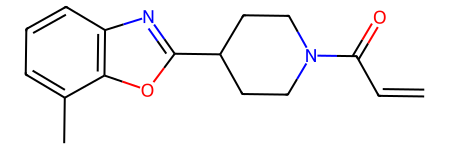

In [6]:
Chem.MolFromSmiles(sol.SMILES[2]) 

In [7]:
for smiles in sol.SMILES[:1]:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
       
        img = Chem.Draw.MolToImage(mol)
        img.show()
        print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x1C41EA0A6E0>


In [8]:
mol_list=[]
for element in sol.SMILES:
    mol=Chem.MolFromSmiles(element)
  
    mol_list.append(mol)

In [9]:
len(mol_list)

406

In [10]:
mol_list[:5]

In [11]:
sol.head()

,SMILES,RESULT
0,CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C,0
1,CN(CC1=NC=2CCCCC2S1)C(=O)C=C,0
2,CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C,0
3,COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1,0
4,C=CC(=O)NCC1COC=2C=CC=CC2O1,0


In [12]:
X=sol.drop(['RESULT'],axis='columns')
Y=sol['RESULT']


In [13]:
X

,SMILES
0,CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C
1,CN(CC1=NC=2CCCCC2S1)C(=O)C=C
2,CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C
3,COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1
4,C=CC(=O)NCC1COC=2C=CC=CC2O1
...,...
401,CC(C)N1CCC(NC(=O)C=C)C1=O
402,C=CC(=O)NCC1CC2(CCC2)CO1
403,CC(C)C(NC(=O)C=C)C1(CO)CC=CC1
404,CC1(CC2CC(C)(C)C1)CN2C(=O)C=C


In [14]:
Y.value_counts()

0    203
1    203
Name: RESULT, dtype: int64

In [15]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys

fp = MACCSkeys.GenMACCSKeys(mol)
fp

In [16]:
fp_string = fp.ToBitString()
fp_array = np.array(list(fp_string), dtype=int)
fp_string

'00000000000000000000000000000000001000000000000000000000000000000000000000010001100101100011100010011000100010110000011001100000010001001110001000011001011010111100110'

In [17]:
fp_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [18]:
len(fp_string)

167

In [19]:
fp_array.shape

(167,)

In [20]:

def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = MACCSkeys.GenMACCSKeys(mol)
    fingerprint = np.array(list(fp.ToBitString()), dtype=int)
    return fingerprint

sol['Fingerprint'] = sol['SMILES'].apply(smiles_to_fingerprint)

X = sol[['Fingerprint']]
X

sol['Fingerprint_Sum'] = sol['Fingerprint'].apply(lambda x: x.sum())

average_fingerprint_sum = sol['Fingerprint_Sum'].mean()

print(sol['Fingerprint_Sum'])
print(average_fingerprint_sum)

0      48
1      43
2      44
3      52
4      38
       ..
401    43
402    37
403    31
404    35
405    39
Name: Fingerprint_Sum, Length: 406, dtype: int32
39.142857142857146


<Axes: >

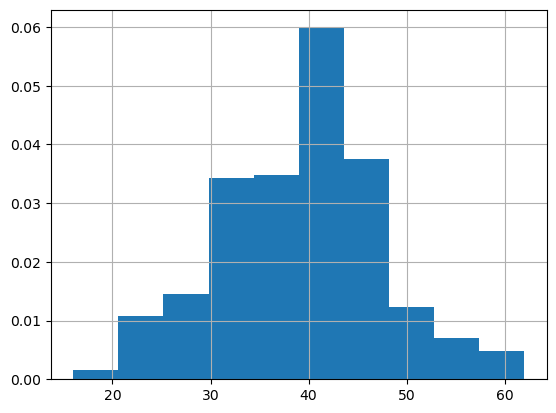

In [45]:
sol['Fingerprint_Sum'].hist(density=1)

In [46]:
fingerprints = sol['Fingerprint'] 
fingerprints_df = pd.DataFrame( fingerprints.tolist())
print(fingerprints_df)
X=fingerprints_df
X

     0    1    2    3    4    5    6    7    8    9    ...  157  158  159  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
1      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
2      0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
3      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
4      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
401    0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
402    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
403    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
404    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
405    0    0    0    0    0    0    0    0    0    0  ...    0    1    1   

     160  161  162  163  164  165  166  
0      1    1    1    1    1    1 

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,1,1,0
402,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,1,1,0
403,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
404,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,1,1,0


In [47]:
Y=sol[['RESULT']]
Y

,RESULT
0,0
1,0
2,0
3,0
4,0
...,...
401,1
402,1
403,1
404,1


In [48]:
Y.value_counts()

RESULT
0         203
1         203
dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [50]:
X_train.shape

(324, 167)

In [51]:
X_test.shape

(82, 167)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Accuracy scores for each fold:
Fold 1: 0.786
Fold 2: 0.357
Fold 3: 0.615
Fold 4: 0.647
Fold 5: 0.722
Fold 6: 0.615
Fold 7: 0.467
Fold 8: 0.765
Fold 9: 0.750
Fold 10: 0.667
Fold 11: 0.750
Fold 12: 0.733
Fold 13: 0.643
Fold 14: 0.688
Fold 15: 0.917

Average accuracy: 0.675


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


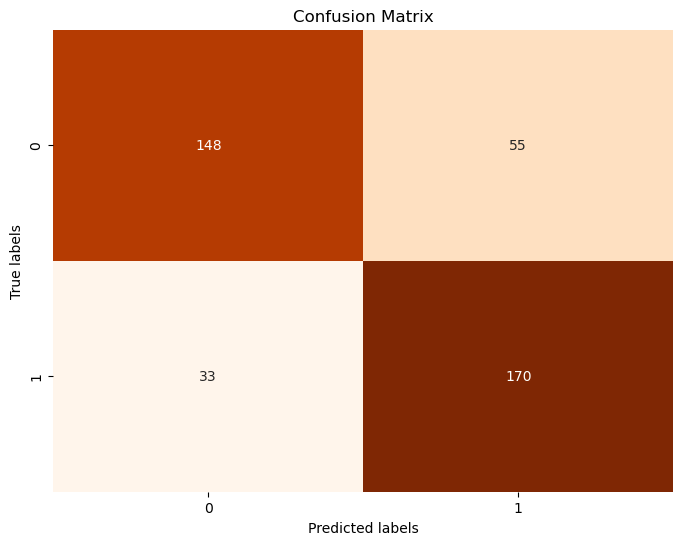

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


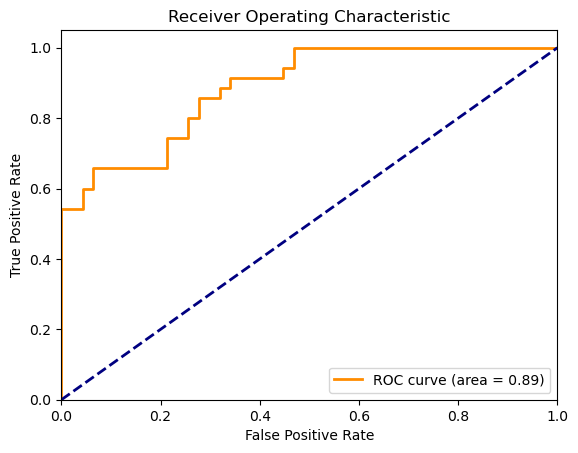

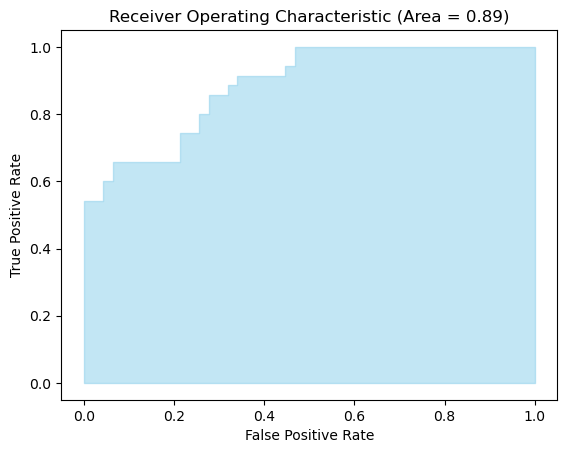

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Accuracy scores for each fold:
Fold 1: 0.786
Fold 2: 0.357
Fold 3: 0.615
Fold 4: 0.647
Fold 5: 0.722
Fold 6: 0.615
Fold 7: 0.467
Fold 8: 0.765
Fold 9: 0.750
Fold 10: 0.667
Fold 11: 0.750
Fold 12: 0.733
Fold 13: 0.643
Fold 14: 0.688
Fold 15: 0.917

Average accuracy: 0.675

Average precision: 0.675
Average Recall: 0.751
Average F1 Score: 0.704


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import csv


svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)


kf = KFold(n_splits=15, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

print("Accuracy scores for each fold:")
for i, score in enumerate(accuracy_scores, 1):
    print(f"Fold {i}: {score:.3f}")

print(f"\nAverage accuracy: {np.mean(accuracy_scores):.3f}")

svm_model.fit(X, Y)


joblib.dump(svm_model, 'svm_model_final.joblib')

Y_preds =svm_model.predict(X)

cm = confusion_matrix(Y, Y_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

svm_model.fit(X, Y)


y_pred_prob = svm_model.predict_proba(X_test)


fpr, tpr, _ = roc_curve(Y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

plt.fill_between(fpr, tpr, color='skyblue', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Area = %0.2f)' % roc_auc)
plt.show()

accuracy_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

precision_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

recall_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='recall')
f1_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='f1')


print("Accuracy scores for each fold:")
for i, score in enumerate(accuracy_scores, 1):
    print(f"Fold {i}: {score:.3f}")

print(f"\nAverage accuracy: {np.mean(accuracy_scores):.3f}")
print(f"\nAverage precision: {np.mean(precision_scores):.3f}")

print(f"Average Recall: {np.mean(recall_scores):.3f}")
print(f"Average F1 Score: {np.mean(f1_scores):.3f}")

svm_model.fit(X, Y)

joblib.dump(svm_model, 'svm_model_final.joblib')


def save_data(file_path, fpr, tpr, roc_auc):
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(fpr)
        writer.writerow(tpr)
        writer.writerow([roc_auc])

save_data('SVM_roc_data.csv', fpr, tpr, roc_auc)

